![title](Sary.jpeg)  


<h1>Abdullah Binmahfouz</h1>


In [1]:
#Libraries
import os
import opendatasets as od
from zipfile import ZipFile
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot
import seaborn  as sns #visualization

#machine learning models libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Download the dataset
dataset_url = 'https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting'
od.download(dataset_url)

Skipping, found downloaded files in "./walmart-recruiting-store-sales-forecasting" (use force=True to force download)


In [3]:
#View the files
os.listdir('walmart-recruiting-store-sales-forecasting')

['features.csv.zip',
 'sampleSubmission.csv.zip',
 'test.csv.zip',
 'train.csv.zip',
 'stores.csv']

In [4]:
train = ZipFile('walmart-recruiting-store-sales-forecasting/train.csv.zip')
features = ZipFile('walmart-recruiting-store-sales-forecasting/features.csv.zip')
test = ZipFile('walmart-recruiting-store-sales-forecasting/test.csv.zip')
sample = ZipFile('walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

In [5]:
# Read files 
train_df = pd.read_csv(train.open('train.csv'))
features_df = pd.read_csv(features.open('features.csv'))
stores_df = pd.read_csv('walmart-recruiting-store-sales-forecasting/stores.csv')
test_df = pd.read_csv(test.open('test.csv'))

In [6]:
train_df.columns , features_df.columns, stores_df.columns

(Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object'),
 Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
        'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
        'IsHoliday'],
       dtype='object'),
 Index(['Store', 'Type', 'Size'], dtype='object'))

### Train table 
This table contains historical data from 2010-02-05 to 2012-11-01 with columns below:
<li>Store number: Number of the store</li>
<li>Date: From 2010-02-05 till 2012-11-01</li>
<li> Weekly sales: amount of sales </li>
<li> IsHolidy: its holdy day or not 

### features.csv:
This table has aditional date contains:
<li> Store: Store number </li> 
<li>Date: From 2010-02-05 till 2013-07-26' </li>
<li>Temp</li>
<li>Fuel_Price:  cost of fuel </li>
<li>Markdown from 1 till 5: promotional after Nov 2011</li>
<li>GPI: price index</li>
<li>Unemployment rate</li>
<li>IsHolidy: holdiay</li>

### stores.csv
Information about the stores: number, type and size of the stores



In [7]:
# check the data type of the date 
print(train_df.Date.dtype, "And",features_df.Date.dtype)
# #convert object to date date type
train_df['Date']=pd.to_datetime(train_df['Date'])
train_df['Date']=pd.to_datetime(train_df['Date'], format='%Y,%M,%d')
# to match the format
features_df['Date']=pd.to_datetime(features_df['Date'])
features_df['Date']=pd.to_datetime(features_df['Date'], format='%Y,%M,%d')

print("Now",train_df.Date.dtype, "And",features_df.Date.dtype)

object And object
Now datetime64[ns] And datetime64[ns]


In [8]:
# Merge the files train, stores and features to increase independet casuse
stores=stores_df.merge(features_df, on='Store', how='left')
dataset = train_df.merge(stores,on=['Store', 'Date', 'IsHoliday'], how='left')


In [9]:
dataset.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106


In [10]:
# Review the measures of indpending and depending varablies
dataset.describe(include='all')

/var/folders/hh/4dtrc1zx2md_jvrwkm25rx1c0000gn/T/ipykernel_6233/895736085.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset.describe(include='all')


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2011-12-23 00:00:00,NaN,False,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,391909,215478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2010-02-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2012-10-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,NaN,NaN,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,NaN,22711.183519,NaN,NaN,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,NaN,-4988.940000,NaN,NaN,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,NaN,2079.650000,NaN,NaN,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000


In [11]:
# Null value
dataset.isnull().mean()* 100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
dtype: float64

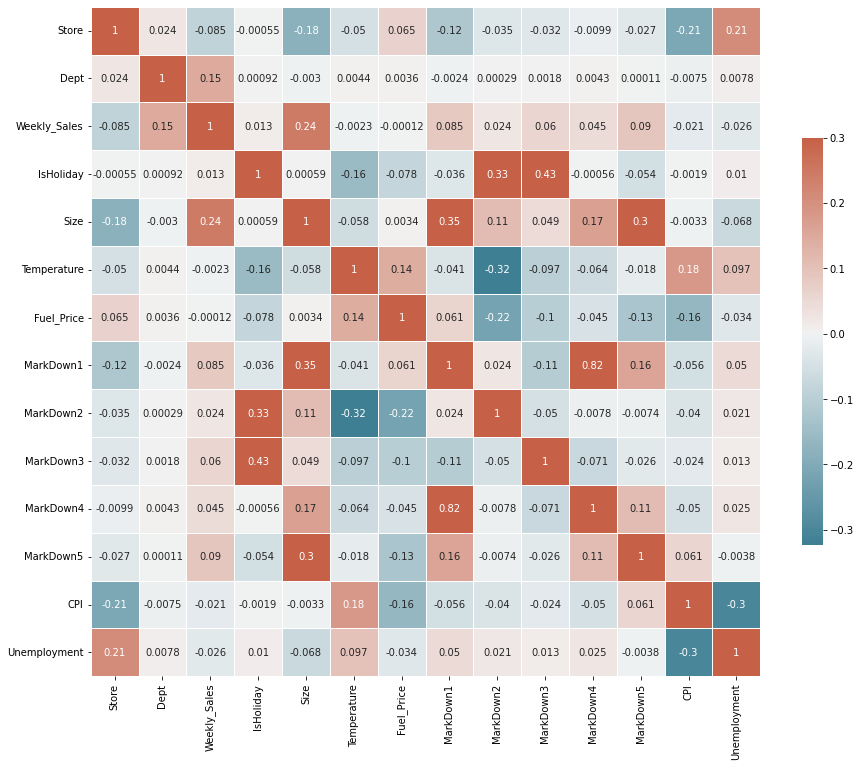

In [12]:
# Find the correlation 
corr = dataset.corr()
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

##### The Size of the store has high correlated with sales  



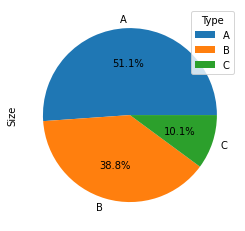

In [13]:
# lest review the size of the store
type_info=dataset.groupby('Type')['Size'].count()
type_info.plot.pie(subplots=True, autopct='%1.1f%%')
plt.legend(title= "Type")
plt.show()


### Many store of type A and less store of type(C,B)

In [14]:
# create column for seasonality
conditions=[
(dataset.Date == '2010-02-12 00:00:00') | (dataset.Date =='2011-02-11 00:00:00') | (dataset.Date =='2012-02-10 00:00:00') 
| (dataset.Date == '2013-02-08 00:00:00'),
(dataset.Date == '2010-09-10 00:00:00')| (dataset.Date =='2011-09-11 00:00:00')| (dataset.Date == '2012-09-07 00:00:00')
| (dataset.Date == '2013-09-06 00:00:00'),
( dataset.Date =='2010-11-26 00:00:00') | (dataset.Date =='2011-11-25 00:00:00')| (dataset.Date == '2012-11-23 00:00:00')
| (dataset.Date == '2013-11-29 00:00:00'),
( dataset.Date =='2010-12-31 00:00:00')| (dataset.Date =='2011-12-30 00:00:00') | (dataset.Date =='2012-12-28 00:00:00')
| (dataset.Date == '2013-12-27 00:00:00')]

values=['super_Bowl','labor_day','thanksgiving','christmas']
dataset['seasonality']=np.select(conditions,values)


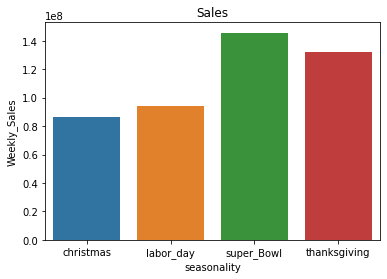

In [15]:

df=dataset[dataset['seasonality'] != '0']
result=df.groupby('seasonality')['Weekly_Sales'].sum()
result=result.reset_index()
sns.barplot(data=result, x='seasonality' , y='Weekly_Sales' )
plt.title('Sales')
plt.show()


#### Data Manipulation
<li>Drop varablies with low correlation</li>
<li>Replace null value with zero</li>
<li>Create varibles for year, month, and week</li>

In [16]:
# Create varibles: 
dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataset[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Week'] = dataset['Date'].dt.isocalendar().week
#Drop variables with low correlation
dataset = dataset.drop(columns=["Fuel_Price", 'Unemployment','Date' ,'Temperature', "CPI"])

In [17]:
dataset.head(2)

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,seasonality,Year,Month,Week
0,1,1,24924.50,False,A,151315,0.0,0.0,0.0,0.0,0.0,0,2010,2,5
1,1,1,46039.49,True,A,151315,0.0,0.0,0.0,0.0,0.0,super_Bowl,2010,2,6


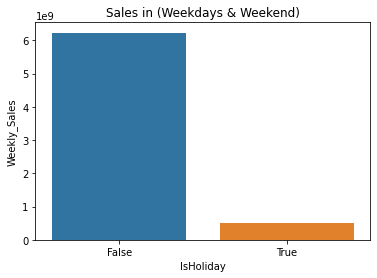

In [18]:
# More is sales in weekdays
prom1=dataset.groupby(['IsHoliday'])['Weekly_Sales'].sum().reset_index()
sns.barplot(data=prom1, x='IsHoliday', y='Weekly_Sales')
plt.title('Sales in (Weekdays & Weekend)')
plt.show()


#### More sales in weekdays

In [19]:
#data to be in the should be numeric format
#changing IsHoliday column with Flase to be 0 and True to be 1
def modify(x):
    if x == False:
        return 0
    return 1

actualScore = dataset['IsHoliday']
newValue = actualScore.map(modify)
dataset['IsHoliday'] = newValue
print("Shape of dataset: ", dataset.shape)
dataset.head(2)

Shape of dataset:  (421570, 15)


,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,seasonality,Year,Month,Week
0,1,1,24924.50,0,A,151315,0.0,0.0,0.0,0.0,0.0,0,2010,2,5
1,1,1,46039.49,1,A,151315,0.0,0.0,0.0,0.0,0.0,super_Bowl,2010,2,6


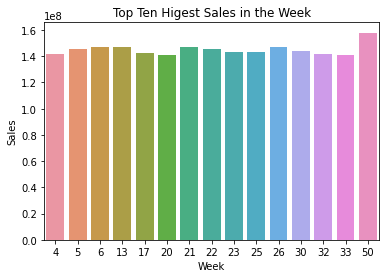

In [20]:
# More sales in weekdays
df_w=dataset.groupby(['Week'])['Weekly_Sales'].sum().reset_index()
high_w=df_w['Weekly_Sales'].nlargest(15).reset_index()
sns.barplot(data=high_w, x='index', y='Weekly_Sales')
plt.title('Top Ten Higest Sales in the Week')
plt.xlabel("Week")
plt.ylabel("Sales")
plt.show()

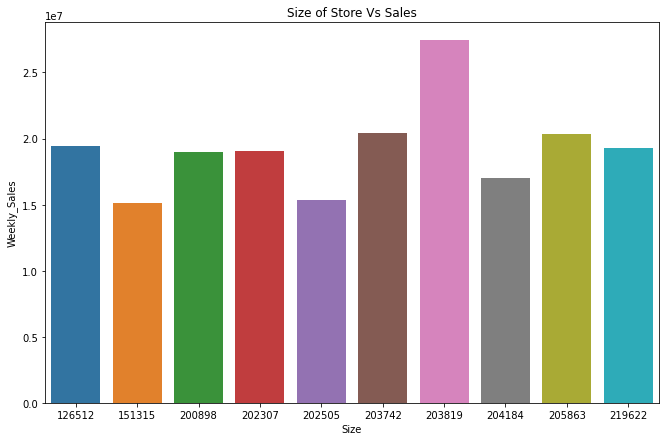

In [21]:
# Size does not effect that much on sales
result=df.groupby('Size')['Weekly_Sales'].sum().nlargest(10)
result=result.reset_index().sort_values('Size', ascending=True)
result
plt.figure(figsize=(11,7))
plt.title('Size of Store Vs Sales')
sns.barplot(data=result, x='Size', y='Weekly_Sales');

In [22]:
# Data should bein the numeric format
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  int64  
 4   Type          421570 non-null  object 
 5   Size          421570 non-null  int64  
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  seasonality   421570 non-null  object 
 12  Year          421570 non-null  int64  
 13  Month         421570 non-null  int64  
 14  Week          421570 non-null  UInt32 
dtypes: UInt32(1), float64(6), int64(6), object(2)
memory usage: 50.3+ MB


In [23]:
# Converting Categorical Variable 'Type' into Numerical Variables.
conditions=[(dataset.Type =="A"),(dataset.Type =="B"),(dataset.Type=="C")]
values=[1,2,3]
dataset['Type2']=np.select(conditions,values)


In [24]:
dataset.seasonality.unique()
dataset['N_super_Bowl']=np.where(dataset['seasonality']== 'super_Bowl',1,0)
dataset['N_labor_day']=np.where(dataset['seasonality']== 'labor_day',1,0)
dataset['N_thanksgiving']=np.where(dataset['seasonality']== 'thanksgiving',1,0)
dataset['N_christmas']=np.where(dataset['seasonality']== 'christmas',1,0)


In [25]:
train = dataset.drop(columns=["Type", 'seasonality'])

In [26]:
train.sort_values(by='Year', ascending=True)
# Sorting the data in increasing order of Date and then splitting.
y = train['Weekly_Sales']
X = train.drop(['Weekly_Sales'], axis=1)

# Train:Test = 70:30 splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Train:CV = 70:30 splitting.
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3) 


In [27]:
def wmae_test(test, pred): # WMAE for test
  weights = X_test['Type2'].apply(lambda is_holiday:5 if is_holiday else 1)
  error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
  return error

In [28]:
#measure of prediction accuracy of a forecasting method(WMAPE)
model_rf = RandomForestRegressor(max_depth= 35, n_estimators=80).fit(X_train, y_train) 
# Fit the model with best hyper parameter values.
y_pred = model_rf.predict(X_test) 
# Predict the test data.
print('Weighted Mean Absolute Error (WMAE) for Random Forest Regression:', wmae_test(y_test, y_pred)) # Get WMAE score.


Weighted Mean Absolute Error (WMAE) for Random Forest Regression: 1513.0496752296715


#### Describe your approach if you have been asked to build an ML model to forecast the sales?

I will use Random Forest Regression model that has less Weighted Mean Absolute Error